## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score

%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
x = np.linspace(0,20)
y=-2*x+1


dict={'x0':1,'x1':x , 'y':y}

df=pd.DataFrame(dict)
df = df.sample(frac=1)


col=df.shape[1]
x=np.matrix(df.iloc[:,0:col-1])
y=np.matrix(df.iloc[:,col-1:col])


theta=np.matrix([0,0])
theta

matrix([[0, 0]])

#### Plot your data points. 

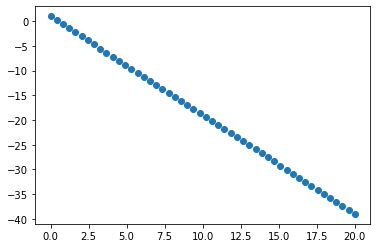

In [3]:
plt.scatter(df.x1,df.y)

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

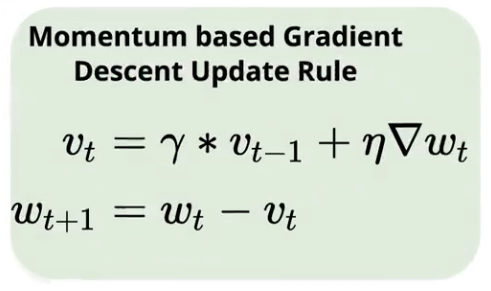

#### γ takes values between 0 and 1.
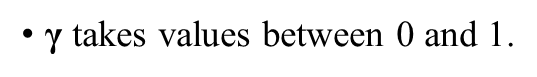

In [4]:
def GDCostFunction(xc,yc,thetac):
    error=np.power(np.linalg.norm(((xc @ thetac.T)- yc),ord=2),2)
    mse=error/(2*len(xc))
    return mse

In [5]:
def gradient(X,Y,Theta):
    theta_parameters=int(Theta.ravel().shape[1]) 
    temp = np.matrix(np.zeros(theta.shape))
    for j in range(theta_parameters):
        error = (X*Theta.T) - Y              # (summation(h(xi) - y ) 
        t= np.multiply(error,X[:,j])         # (summation(h(xi) - y ) *xi
        temp[:,j] = 1/len(x) * np.sum(t)
    grad=temp
    return grad

In [6]:
def momentum_vt(x,y,theta,v,gama,lr):
    if len(v)== 0:
        v.append(np.matrix([0,0]))
        return v

    v.append((gama * v[-1]) + (lr * gradient(x,y,theta)))
    
    return v

In [81]:
alpha=0.001
itera=100
gama=0.6

In [82]:
def Batch_GD(X,Y,Theta,LearnRate,iteration,gama):  #theta_new= theta_old - (alpha * 1/m *(summation(h(xi) - y ) *xi)
    temp = np.matrix(np.zeros(Theta.shape))
    cost = np.zeros(iteration)                       # save the value of cost for each iterative
    theta_parameters=int(Theta.ravel().shape[1])     # to get numper of thetas with code not manually
    tt0=[]
    tt1=[]
    h=[]
    v=[]
    for i in range(iteration):
        
        tt0.append(Theta[0,0])
        tt1.append(Theta[0,1])
        h.append(X*Theta.T)
        cost[i] = GDCostFunction(X,Y,Theta) 
        vt = momentum_vt(X,Y,Theta,v,gama,LearnRate)
        l=len(cost)
        
        
        temp = Theta - vt[-1]
        
        Theta=temp
        
       
    return Theta , cost,tt0,tt1,h,vt

In [83]:
th_op,cost,th0,th1,hypo ,vt =Batch_GD(x,y,theta,alpha,itera,gama)

In [84]:
th_op

matrix([[-0.07321093, -1.9201704 ]])

In [85]:
y_hat=th_op[0,0] + th_op[0,1]*df.x1

Text(0, 0.5, 'Cost Value')

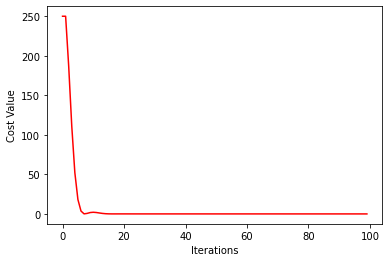

In [86]:
fig,ax = plt.subplots()
ax.plot(np.arange(itera), cost ,'r')

ax.set_xlabel('Iterations')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'y1- data')

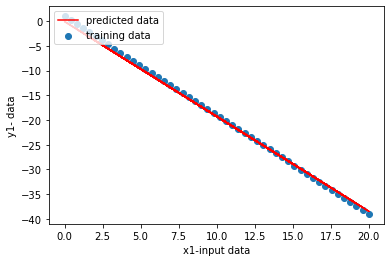

In [87]:
fig ,ax =plt.subplots()
ax.plot(df.x1 , y_hat , 'r', label='predicted data')
ax.scatter(df.x1 , df.y, label='training data')
ax.legend(loc=2)
ax.set_xlabel('x1-input data')
ax.set_ylabel('y1- data')

In [88]:
th0=np.array(th0)
th0=th0.ravel()
th1=np.array(th1)
th1=th1.ravel()

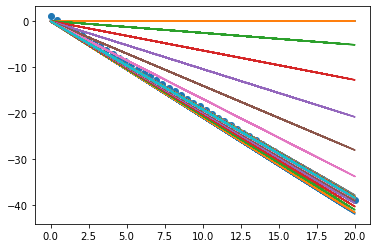

In [89]:
plt.scatter(df.x1,df.y)
for i in  hypo:
    plt.plot(df.x1,i)

Text(0, 0.5, 'Cost Value')

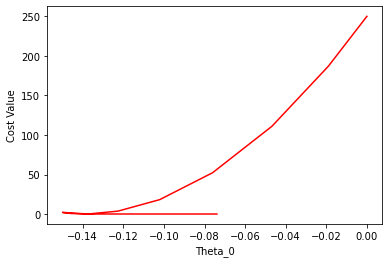

In [90]:
fig,ax = plt.subplots()
ax.plot(th0, cost ,'r')

ax.set_xlabel('Theta_0')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'Cost Value')

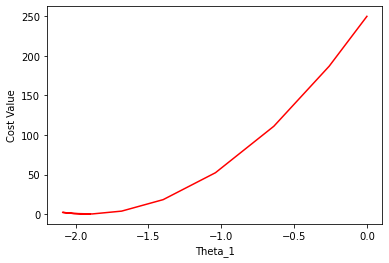

In [91]:
fig,ax = plt.subplots()
ax.plot(th1, cost ,'r')

ax.set_xlabel('Theta_1')
ax.set_ylabel('Cost Value')

In [92]:
r2_score(df.y , y_hat)

0.9978622009794226

### Update your Batch GD for one variable  implementation to be NAG and check your results

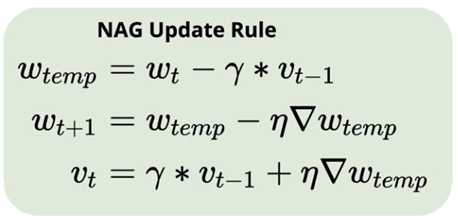

In [119]:
alpha=0.001
itera=100
gama=1

In [120]:
def NAG_vt(x,y,theta,v,gama,lr):
    if len(v)== 0:
        v.append(np.matrix([0,0]))
        theta_new=np.matrix([0,0])
        return theta_new ,v
    theta_temp=theta-gama*v[-1]
    
    w_grad=lr*gradient(x,y,theta_temp)
    
    theta_new= theta_temp - w_grad
    
    v.append((gama * v[-1]) + w_grad)
    
    return theta_new ,v

In [121]:
def Batch_GD(X,Y,Theta,LearnRate,iteration,gama):  #theta_new= theta_old - (alpha * 1/m *(summation(h(xi) - y ) *xi)
    temp = np.matrix(np.zeros(Theta.shape))
    theta_parameters=int(Theta.ravel().shape[1])     # to get numper of thetas with code not manually
    cost=[]
    tt0=[]
    tt1=[]
    h=[]
    v=[]
    for i in range(iteration):
        
        tt0.append(Theta[:,0])
        tt1.append(Theta[:,1])
        h.append(X*Theta.T)
        cost.append(GDCostFunction(X,Y,Theta) )
        
        thetaNag,vt = NAG_vt(X,Y,Theta,v,gama,LearnRate)
        
        temp = thetaNag
        
        Theta=temp
        
       
    return Theta , cost,tt0,tt1,h,vt

In [122]:
th_op,cost,th0,th1,hypo ,vt =Batch_GD(x,y,theta,alpha,itera,gama)

In [123]:
th_op

matrix([[ 1.01563051, -1.99983712]])

In [124]:
y_hat=th_op[0,0] + th_op[0,1]*df.x1

Text(0, 0.5, 'Cost Value')

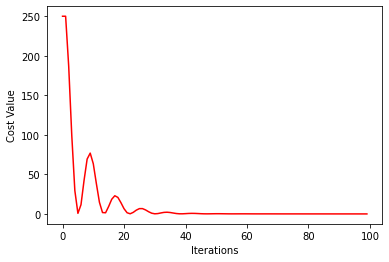

In [125]:
fig,ax = plt.subplots()
ax.plot(np.arange(itera), cost ,'r')

ax.set_xlabel('Iterations')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'y1- data')

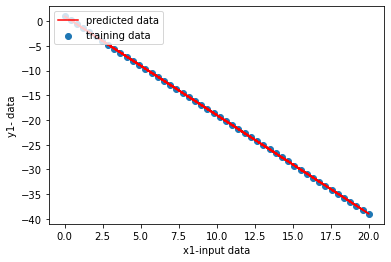

In [126]:
fig ,ax =plt.subplots()
ax.plot(df.x1 , y_hat , 'r', label='predicted data')
ax.scatter(df.x1 , df.y, label='training data')
ax.legend(loc=2)
ax.set_xlabel('x1-input data')
ax.set_ylabel('y1- data')

In [127]:
th0=np.array(th0)
th0=th0.ravel()
th1=np.array(th1)
th1=th1.ravel()

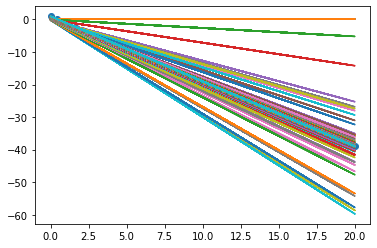

In [128]:
plt.scatter(df.x1,df.y)
for i in  hypo:
    plt.plot(df.x1,i)

Text(0, 0.5, 'Cost Value')

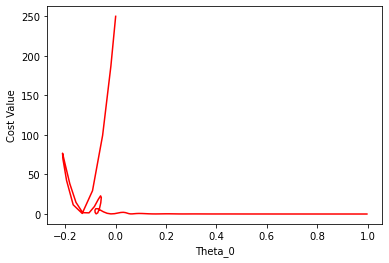

In [129]:
fig,ax = plt.subplots()
ax.plot(th0, cost ,'r')

ax.set_xlabel('Theta_0')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'Cost Value')

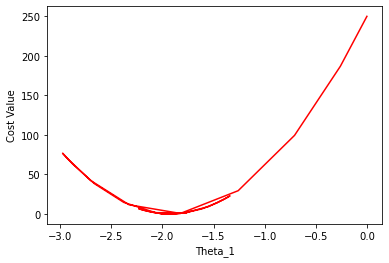

In [130]:
fig,ax = plt.subplots()
ax.plot(th1, cost ,'r')

ax.set_xlabel('Theta_1')
ax.set_ylabel('Cost Value')





In [131]:
r2_score(df.y , y_hat)

0.999997846844521